In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = './Data/XRD'

files = list(os.walk(folder))[0][2]

print('Files to read: ', files)

a = pd.DataFrame()

# Extract XRD x and y component.
for file in files:
  a[file +'_x'] = pd.read_csv(folder + '/' + file, sep=' ', names = ['x', 'y'])['x']
  a[file+'_y'] = pd.read_csv(folder + '/' + file, sep=' ', names = ['x', 'y'])['y']

Files to read:  ['c1_Cs25FA50MA25.xy', 'r3_Cs75FA0MA25.xy', 'r2_Cs37FA62MA01.xy', 'r1_Cs67FA24MA10.xy', 'c2_Cs25FA71MA04.xy', 'c3_Cs71FA01MA28.xy']


r3_Cs75FA0MA25.xy


<AxesSubplot:xlabel='x'>

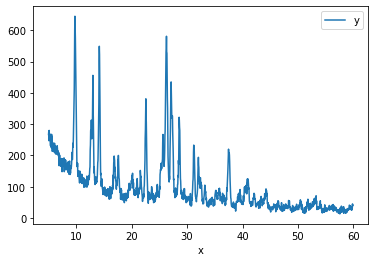

In [3]:
# Investigate the raw data files with and without xlim.

file = files[1]

print(file)

file_df = pd.read_csv(folder + '/' + file, sep=' ', names = ['x', 'y'])
file_df.plot(x='x', y='y')
#plt.xlim(8, 15)

In [4]:
# Scale the data
b = a/a.max()
b

,c1_Cs25FA50MA25.xy_x,c1_Cs25FA50MA25.xy_y,r3_Cs75FA0MA25.xy_x,r3_Cs75FA0MA25.xy_y,r2_Cs37FA62MA01.xy_x,r2_Cs37FA62MA01.xy_y,r1_Cs67FA24MA10.xy_x,r1_Cs67FA24MA10.xy_y,c2_Cs25FA71MA04.xy_x,c2_Cs25FA71MA04.xy_y,c3_Cs71FA01MA28.xy_x,c3_Cs71FA01MA28.xy_y
0,0.083445,0.169184,0.083445,0.413953,0.154036,0.137528,0.154036,0.212621,0.154036,0.139638,0.083445,0.392481
1,0.084112,0.180060,0.084112,0.429457,0.154652,0.152223,0.154652,0.226265,0.154652,0.167919,0.084112,0.429073
2,0.084780,0.168580,0.084780,0.382946,0.155268,0.133007,0.155268,0.207504,0.155268,0.180734,0.084780,0.422055
3,0.085447,0.151057,0.085447,0.434109,0.155884,0.129992,0.155884,0.204662,0.155884,0.167035,0.085447,0.380952
4,0.086115,0.133535,0.086115,0.386047,0.156500,0.152223,0.156500,0.210347,0.156500,0.160848,0.086115,0.398496
...,...,...,...,...,...,...,...,...,...,...,...,...
1369,0.997330,0.016918,0.997330,0.049612,0.997535,0.026752,0.997535,0.052302,0.997535,0.026513,0.997330,0.056642
1370,0.997997,0.015106,0.997997,0.046512,0.998152,0.034288,0.998152,0.067652,0.998152,0.028281,0.997997,0.052130
1371,0.998665,0.018731,0.998665,0.069767,0.998768,0.032404,0.998768,0.051734,0.998768,0.031816,0.998665,0.048120
1372,0.999332,0.025982,0.999332,0.062016,0.999384,0.032781,0.999384,0.056282,0.999384,0.036235,0.999332,0.056642


In [5]:
# Investigate the results of scaling.
cols = ['c1_Cs25FA50MA25.xy_y', 'c2_Cs25FA71MA04.xy_y', 'c3_Cs71FA01MA28.xy_y']

for i in cols:
  print(a[i])
  print(b[i])

0       280.0
1       298.0
2       279.0
3       250.0
4       221.0
        ...  
1369     28.0
1370     25.0
1371     31.0
1372     43.0
1373     31.0
Name: c1_Cs25FA50MA25.xy_y, Length: 1374, dtype: float64
0       0.169184
1       0.180060
2       0.168580
3       0.151057
4       0.133535
          ...   
1369    0.016918
1370    0.015106
1371    0.018731
1372    0.025982
1373    0.018731
Name: c1_Cs25FA50MA25.xy_y, Length: 1374, dtype: float64
0       316.0
1       380.0
2       409.0
3       378.0
4       364.0
        ...  
1369     60.0
1370     64.0
1371     72.0
1372     82.0
1373     83.0
Name: c2_Cs25FA71MA04.xy_y, Length: 1374, dtype: float64
0       0.139638
1       0.167919
2       0.180734
3       0.167035
4       0.160848
          ...   
1369    0.026513
1370    0.028281
1371    0.031816
1372    0.036235
1373    0.036677
Name: c2_Cs25FA71MA04.xy_y, Length: 1374, dtype: float64
0       783.0
1       856.0
2       842.0
3       760.0
4       795.0
        ...  
1369  

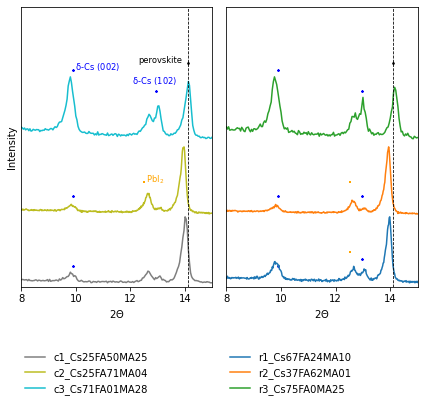

In [6]:
def plotter(axes, cols, offset=0):
  global colors
  for i in cols:
    axes.plot(a[i+'_x'], b[i+'_y'] + offset, label=i.split('.')[0], color=('C'+str(colors)))
    offset += 1
    colors += 1


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6,6))

cols1 = ['c1_Cs25FA50MA25.xy', 'c2_Cs25FA71MA04.xy', 'c3_Cs71FA01MA28.xy']
cols2 = ['r1_Cs67FA24MA10.xy', 'r2_Cs37FA62MA01.xy', 'r3_Cs75FA0MA25.xy']

offset = 0

colors = 7

plotter(ax1, cols1)
plotter(ax2, cols2)

ax1.set_xlim(8, 15)
ax2.set_xlim(8, 15)

ylim = 4
ax1.set_ylim(0, ylim)
ax2.set_ylim(0, ylim)

ax1.tick_params(left=False, labelleft=False)
ax2.tick_params(left=False, labelleft=False)

ax1.set_ylabel('Intensity')

ax1.set_xlabel(r"2$\Theta$")
ax2.set_xlabel(r"2$\Theta$")

height = -0.4
ax1.legend(loc=(0,height), frameon=False)
ax2.legend(loc=(0,height), frameon=False)


fontsize = 'small'

for i in range(2):
    if i == 0:
        ax = ax1
    else:
        ax = ax2

    if i==0:
        ax.text(9.9, 3.1, r' $ {\rm \delta}$-Cs (002)', c='b', fontsize=fontsize)
    ax.scatter([9.9], [3.1], marker='*', c='b', s=4)
    ax.scatter([9.9], [1.3], marker='*', c='b', s=4)
    ax.scatter([9.9], [0.3], marker='*', c='b', s=4)
    
    if i==0:
        ax.text(12, 2.9, r' ${\rm \delta}$-Cs (102)', c='b', fontsize=fontsize)
    ax.scatter([12.95], [2.8], marker='*', c='b', s=4)
    if i == 1:
        ax.scatter([12.95], [1.3], marker='*', c='b', s=4)
        ax.scatter([12.95], [0.4], marker='*', c='b', s=4)

    if i==0:
        ax.text(12.3, 3.2, r'perovskite', fontsize=fontsize)
    ax.scatter([14.1], [3.2], marker='d', c='k', s=4)
    ax.plot([14.1, 14.1], [0, ylim], '--k', linewidth=0.8)
    
    if i==0:
        ax.text(12.51, 1.5, r' PbI$_2$', c='orange', fontsize=fontsize)
    ax.scatter([12.51], [1.5], marker='+', c='orange', s=4)
    if i == 1:
        ax.scatter([12.51], [0.5], marker='+', c='orange', s=4)

plt.tight_layout()
fig.savefig('xrd_films_clustered.png', dpi = 600, bbox_inches = 'tight')
fig.savefig('xrd_films_clustered.svg', bbox_inches = 'tight')